In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('breast-cancer-wisconsin.csv', header=None)

df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

print(df)   # class 2: 양성, class 4: 악성
print(df.info())  

print(df['bare_nuclei'].unique()) #bare_nuclei만 object이므로 누락행 확인
df['bare_nuclei'].replace('?', np.nan, inplace=True)      # ?을 nan으로 변환
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 결측값이 있는 행 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')      # object형인 bare_nuclei를 int형으로 변환

          id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0    1000025      5          1           1         1          2           1   
1    1002945      5          4           4         5          7          10   
2    1015425      3          1           1         1          2           2   
3    1016277      6          8           8         1          3           4   
4    1017023      4          1           1         3          2           1   
..       ...    ...        ...         ...       ...        ...         ...   
694   776715      3          1           1         1          3           2   
695   841769      2          1           1         1          2           1   
696   888820      5         10          10         3          7           3   
697   897471      4          8           6         4          3           4   
698   897471      4          8           8         5          4           5   

     chromatin  normal_nucleoli  mitoses  class  
0

In [238]:
df.info() # 모든 열이 int형으로 변환 되었음을 확인
print(df['bare_nuclei'].unique()) # 누락 행이 삭제 되었음을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB
[ 1 10  2  4  3  9  7  5  8  6]


# 유방암 분류 데이터셋 분석 

### 세포의 평균 크기와 모양과의 연관성 

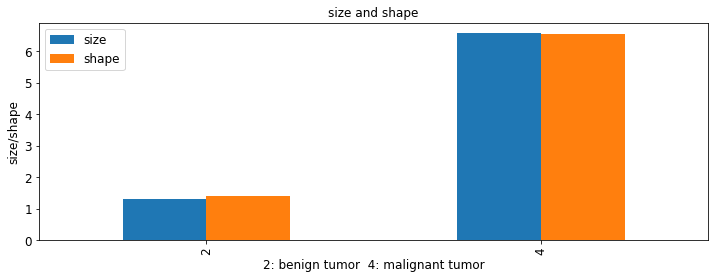

In [273]:
gb_cell_size= df.groupby("class")[['cell_size','cell_shape']].mean()

ax = gb_cell_size.plot(kind='bar', title='size and shape', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('2: benign tumor  4: malignant tumor', fontsize=12)         
ax.set_ylabel('size/shape', fontsize=12)   
ax.legend(['size', 'shape'], fontsize=12)  

### 종양의 유착력(adhesion)과의 연관성

class
2    1.346847
4    5.585774
Name: adhesion, dtype: float64


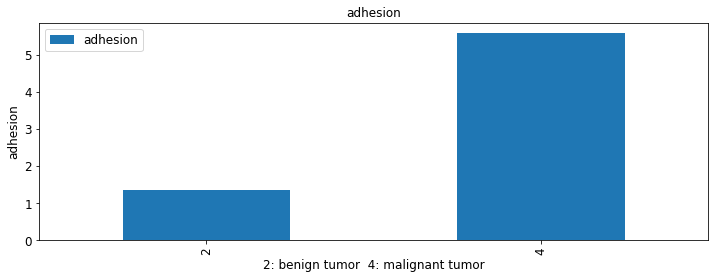

In [271]:
gb_adhension = df.groupby('class')['adhesion'].mean()

ax = gb_adhension.plot(kind='bar', title='adhesion', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('2: benign tumor  4: malignant tumor', fontsize=12)         
ax.set_ylabel('adhesion', fontsize=12)   
ax.legend(['adhesion'], fontsize=12)  

print(gb_adhension)

### 종양의 염색질(chromatin)과의 연관성

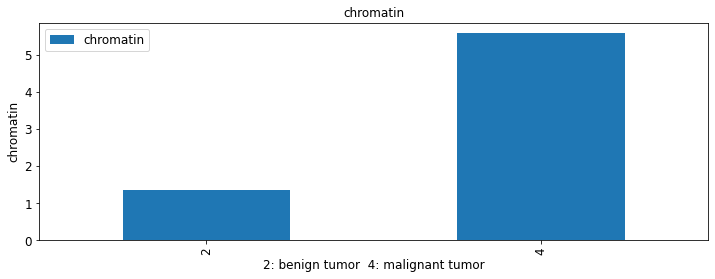

In [276]:
gd_chromatin = df.groupby('class')['chromatin'].mean()

ax = gb_adhension.plot(kind='bar', title='chromatin', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('2: benign tumor  4: malignant tumor', fontsize=12)         
ax.set_ylabel('chromatin', fontsize=12)   
ax.legend(['chromatin'], fontsize=12)  

# 의사 결정 트리 모델로 유방 암 판별

In [239]:
X=df[['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]  #설명 변수 X
y=df['class']        #예측 변수로 사용할 'class'

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5) 
tree_model.fit(X_train, y_train)        
y_hat = tree_model.predict(X_test)   # 2: 양성 4: 악성

print(y_hat[0:30])
print(y_test.values[0:30])

[4 4 4 4 4 4 2 2 4 4 4 2 2 4 4 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2]
[4 4 4 4 4 4 2 2 4 4 4 2 2 4 4 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2]


# 모델 평가

In [231]:
from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(tree_matrix)

# 양성을 정확하게 예측한 TP는 127개
# 양성을 악성으로 잘못 분류한 FP는 4개
# 악성을 양성으로 잘못 분류한 FN은 2개
# 악성을 정확하게 예측한 TN은 72개

[[127   4]
 [  2  72]]


In [232]:
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)

# f1-csore 지표 기준으로
#양성 종양(2) 예측 정확도가 0.98 
# 악성 종양(4) 예측의 정확도는 0.96이다.
# 평균적으로 0.97의 정확도를 가진다.

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

